In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("taxi_trip_pricing.csv")
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [3]:
df.shape

(1000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [5]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


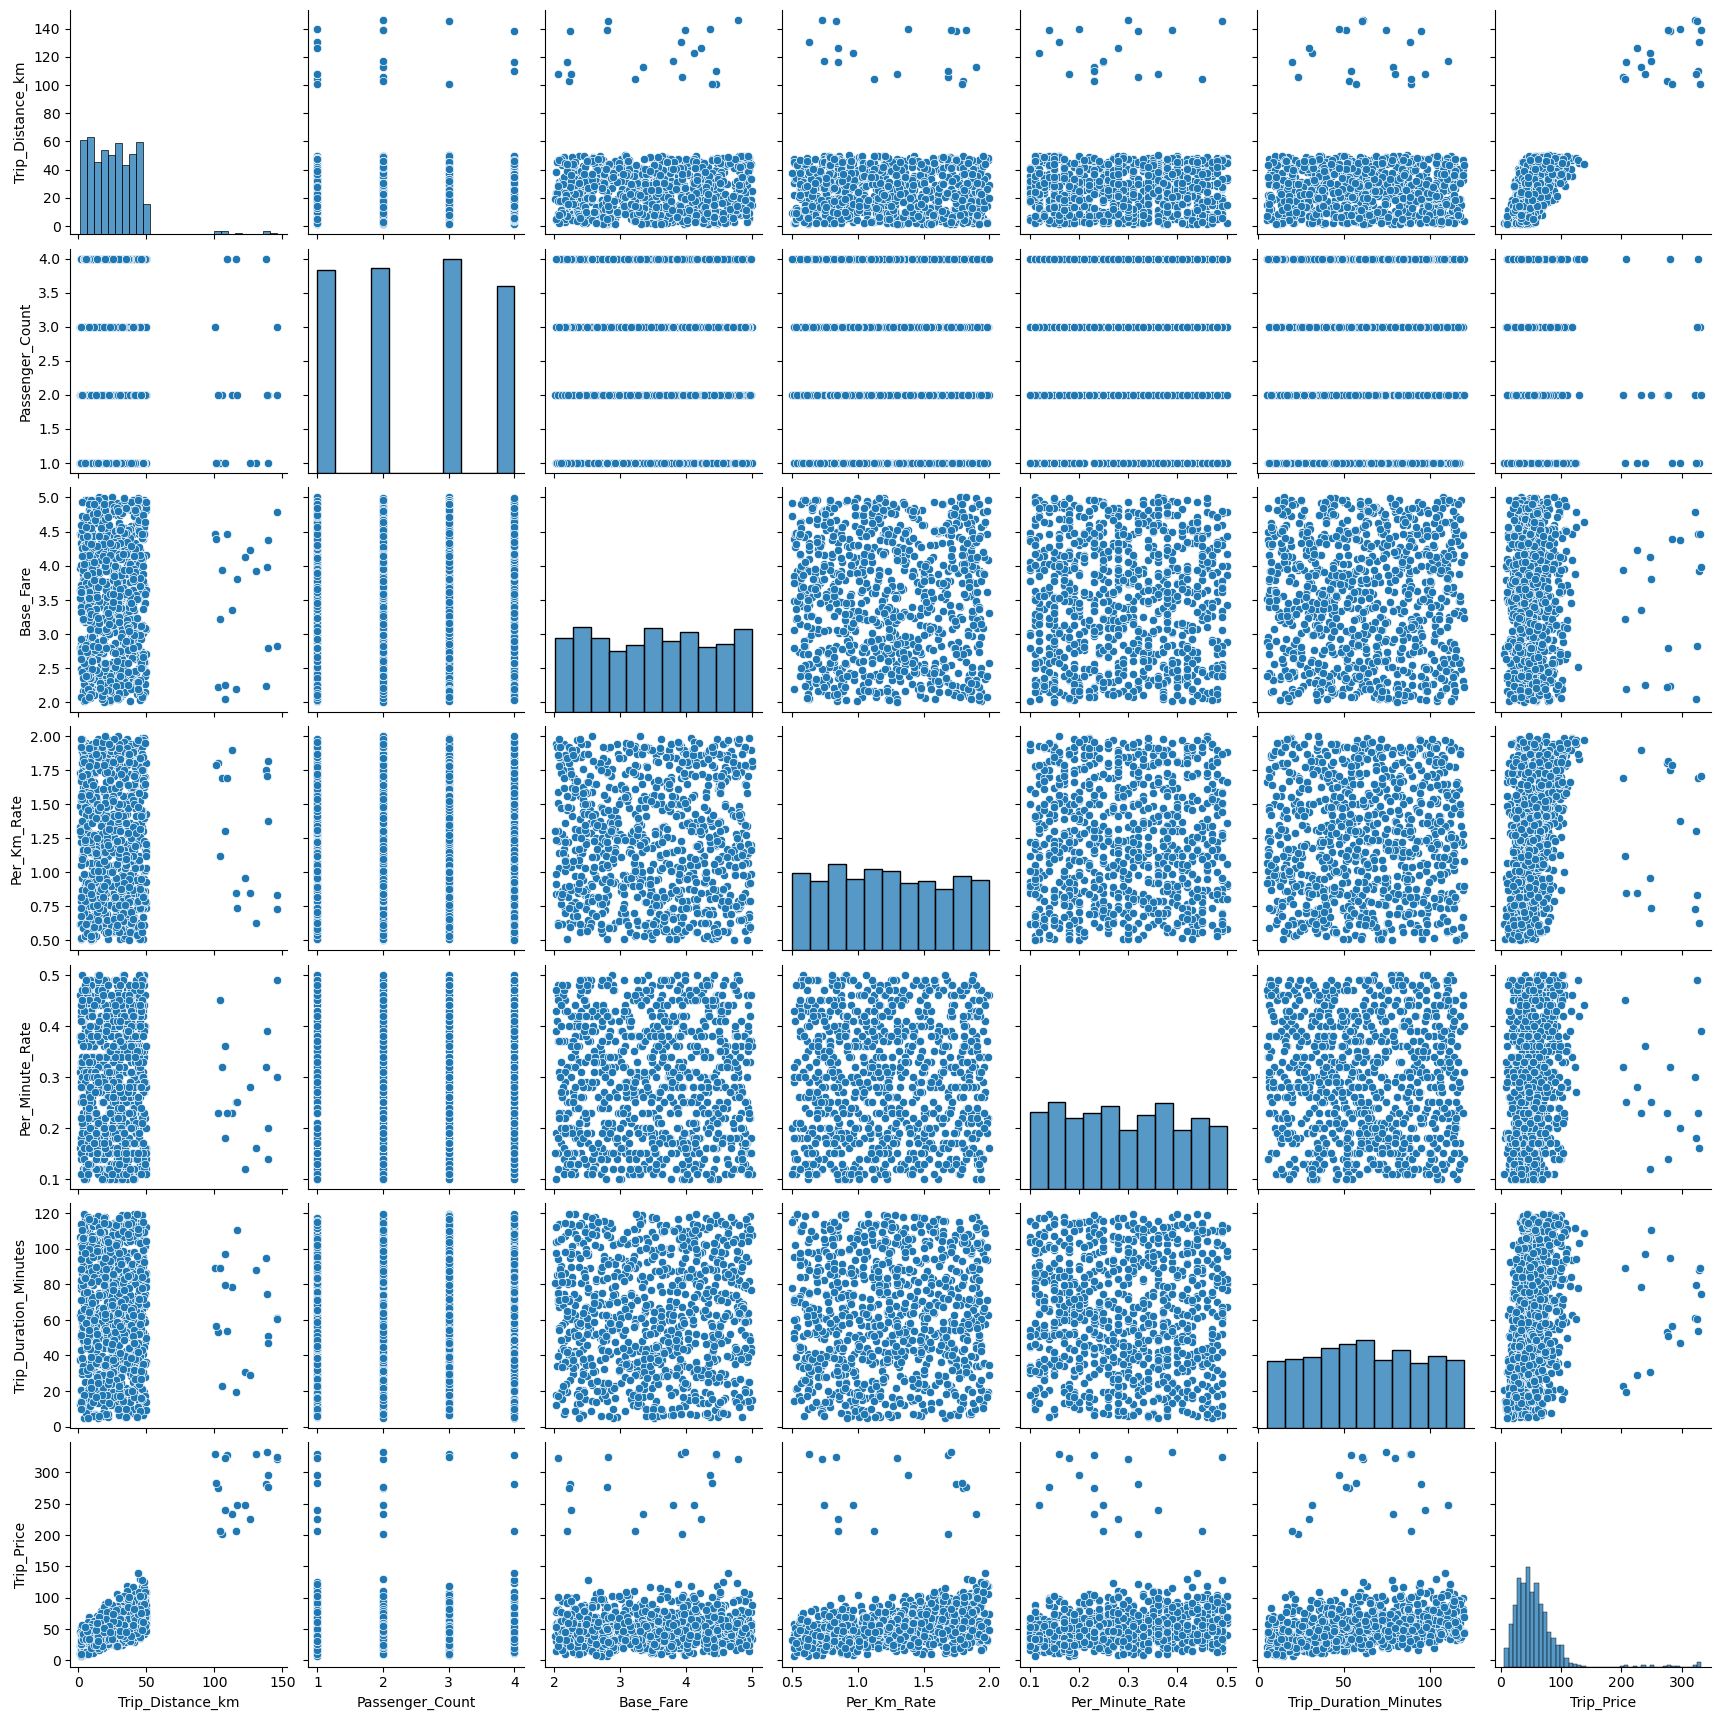

In [6]:
sns.pairplot(df)
plt.show()

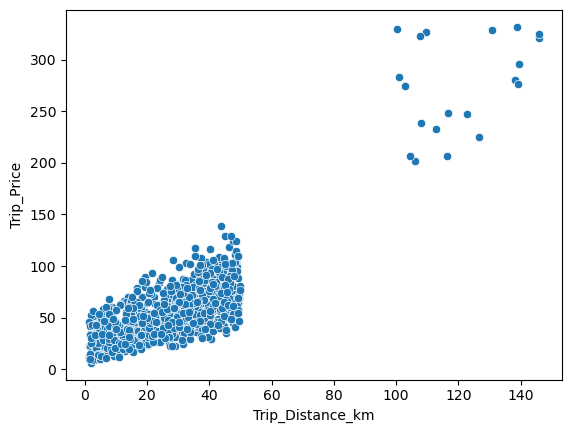

In [7]:
sns.scatterplot(x=df["Trip_Distance_km"],y=df["Trip_Price"])
plt.show()

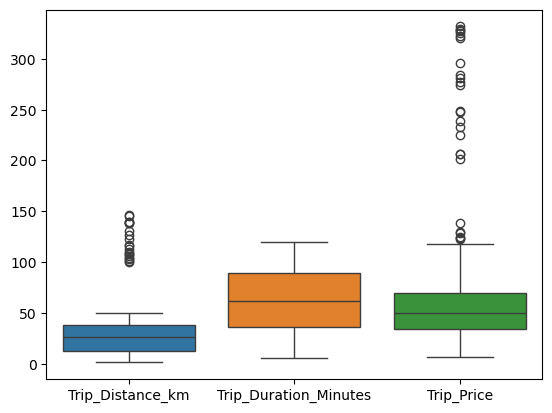

In [8]:
sns.boxplot(df[["Trip_Distance_km","Trip_Duration_Minutes","Trip_Price"]])
plt.show()

In [9]:
# removing outlier data

df = df[(df["Trip_Price"] <= 150) | (df["Trip_Price"].isnull())]

In [10]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              48
Day_of_Week              50
Passenger_Count          49
Traffic_Conditions       50
Weather                  49
Base_Fare                50
Per_Km_Rate              48
Per_Minute_Rate          48
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

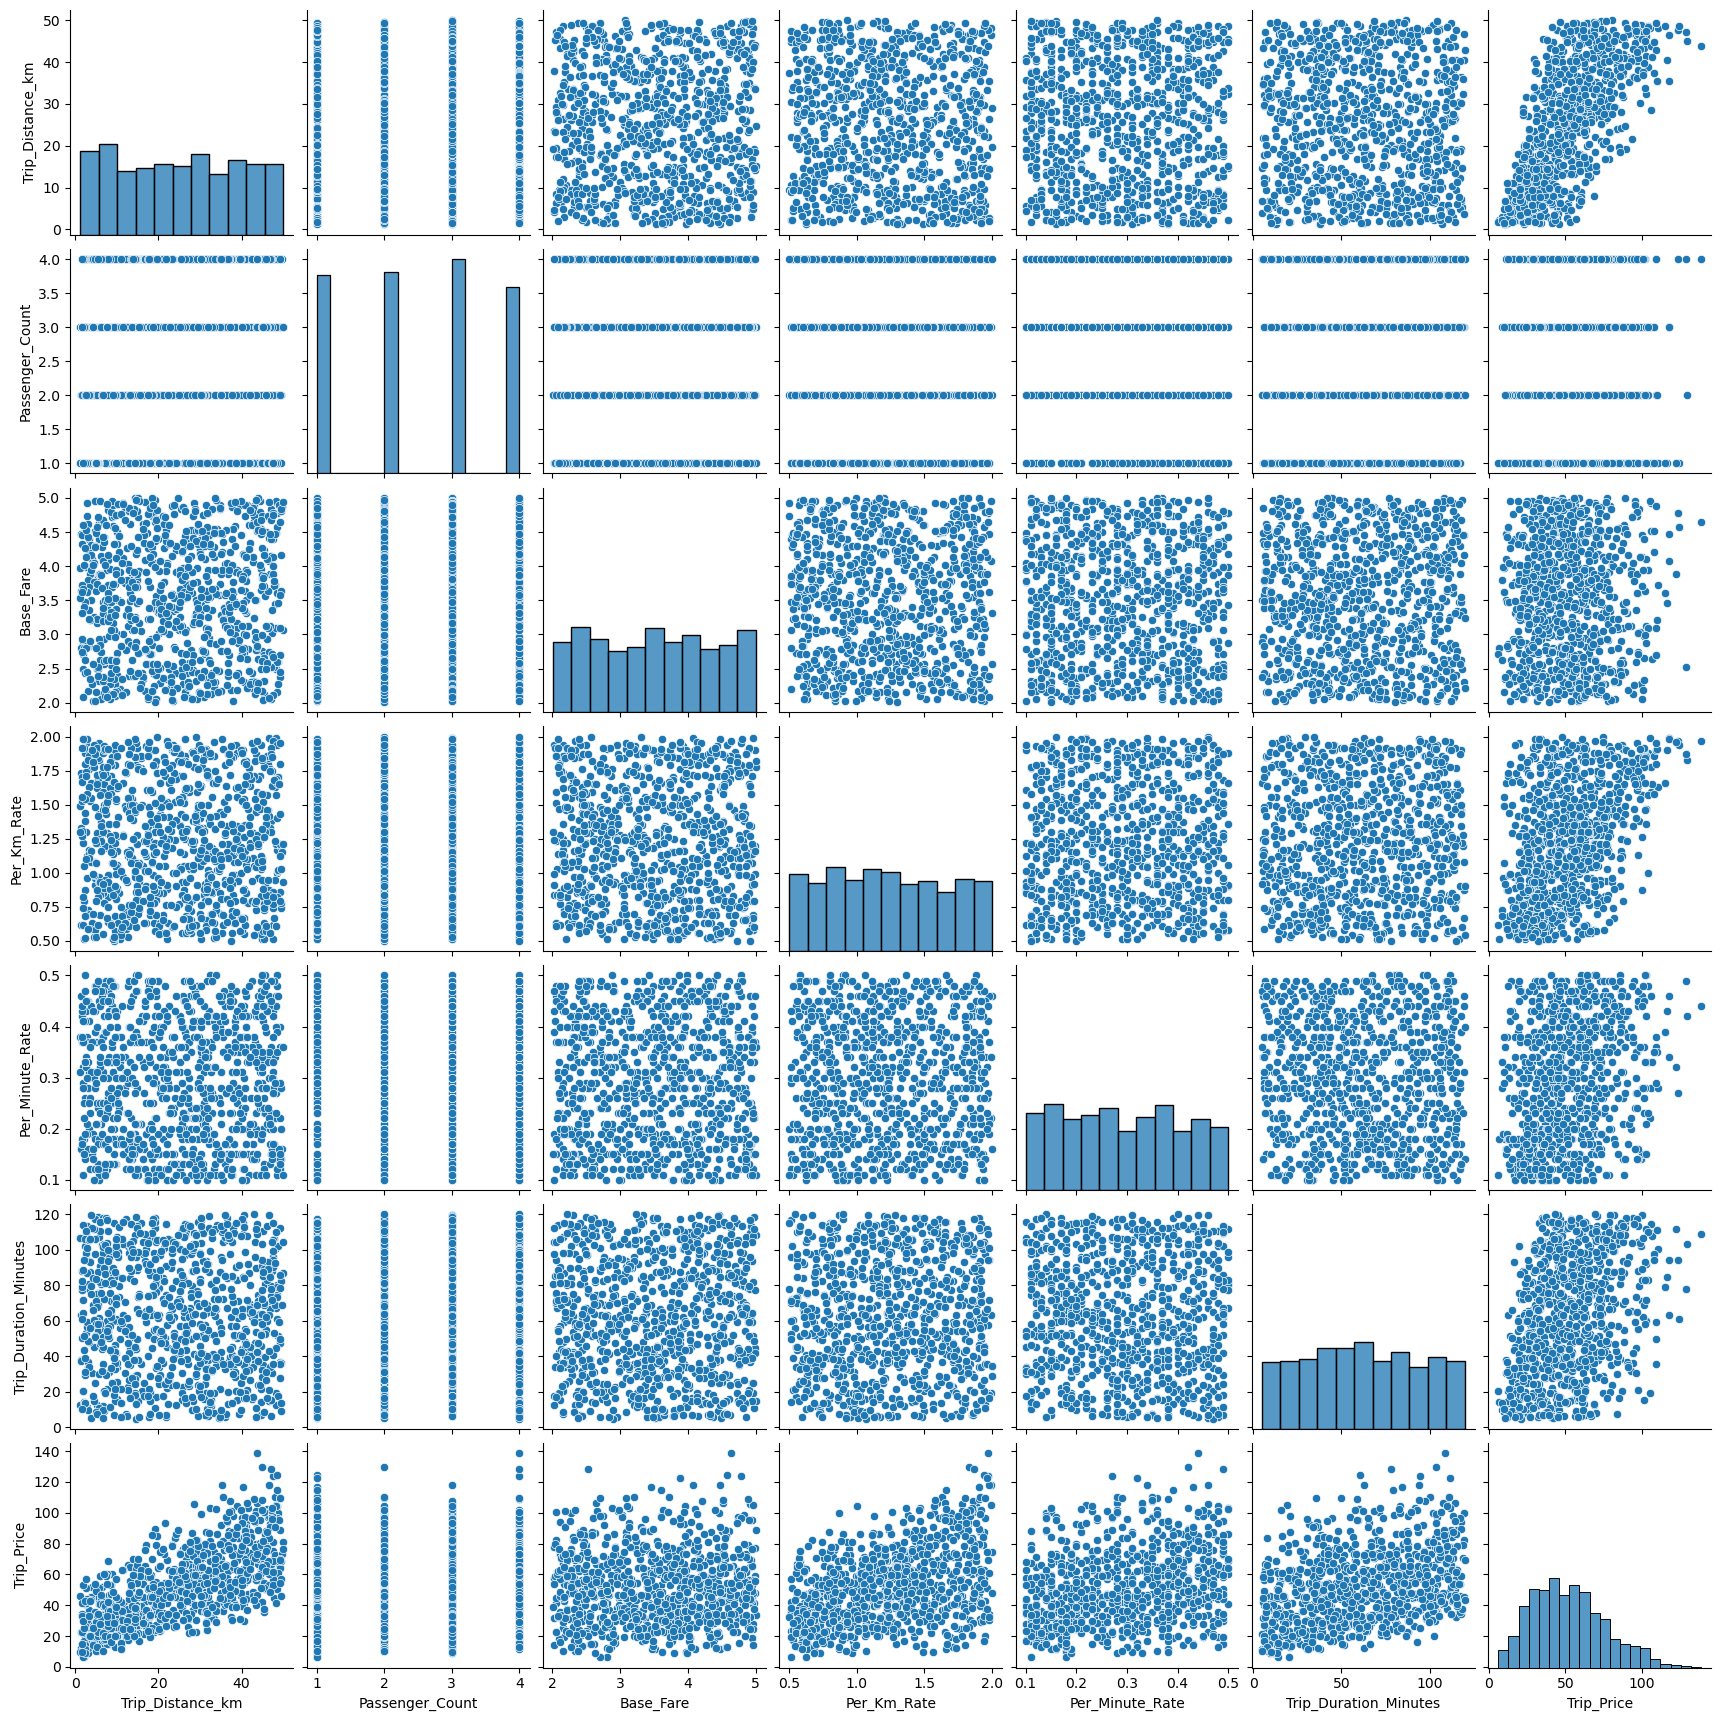

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
numerical_columns=["Trip_Distance_km","Passenger_Count","Base_Fare","Per_Km_Rate","Per_Minute_Rate","Trip_Duration_Minutes","Trip_Price"]
for col in numerical_columns:
    print(df[col].value_counts())

Trip_Distance_km
10.14    3
31.29    3
3.22     3
3.00     3
13.64    3
        ..
22.85    1
26.71    1
30.25    1
17.38    1
48.32    1
Name: count, Length: 847, dtype: int64
Passenger_Count
3.0    249
2.0    234
1.0    231
4.0    217
Name: count, dtype: int64
Base_Fare
3.94    9
3.88    8
2.32    8
2.38    7
2.17    7
       ..
2.78    1
2.37    1
3.14    1
4.22    1
2.67    1
Name: count, Length: 289, dtype: int64
Per_Km_Rate
0.63    14
1.50    13
0.79    12
1.92    12
0.82    11
        ..
0.52     2
1.99     2
0.50     2
2.00     2
1.68     2
Name: count, Length: 150, dtype: int64
Per_Minute_Rate
0.15    35
0.28    32
0.38    31
0.18    31
0.12    29
0.23    27
0.42    27
0.31    27
0.11    26
0.20    26
0.19    25
0.26    24
0.30    24
0.17    24
0.34    24
0.40    23
0.37    23
0.36    23
0.49    23
0.33    22
0.39    22
0.48    21
0.14    21
0.27    21
0.43    21
0.21    21
0.44    21
0.13    21
0.46    21
0.22    20
0.16    20
0.47    20
0.35    20
0.45    20
0.32    19
0.24 

In [13]:
categorical_columns=["Time_of_Day","Day_of_Week","Traffic_Conditions","Weather"]
for col in categorical_columns:
    print(df[col].value_counts())

Time_of_Day
Afternoon    362
Morning      279
Evening      200
Night         91
Name: count, dtype: int64
Day_of_Week
Weekday    640
Weekend    290
Name: count, dtype: int64
Traffic_Conditions
Low       390
Medium    366
High      174
Name: count, dtype: int64
Weather
Clear    656
Rain     220
Snow      55
Name: count, dtype: int64


In [14]:
# filling missing data

df['Trip_Distance_km'] = df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].mean())
df['Passenger_Count'] = df['Passenger_Count'].fillna(df['Passenger_Count'].median())
df['Base_Fare'] = df['Base_Fare'].fillna(df['Base_Fare'].mean())
df['Per_Minute_Rate'] = df['Per_Minute_Rate'].fillna(df['Per_Minute_Rate'].mean())
df['Per_Km_Rate'] = df['Per_Km_Rate'].fillna(df['Per_Km_Rate'].mean())
df['Trip_Duration_Minutes'] = df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].mean())
df['Trip_Price'] = df['Trip_Price'].fillna(df['Trip_Price'].mean())
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])
df['Traffic_Conditions'] = df['Traffic_Conditions'].fillna(df['Traffic_Conditions'].mode()[0])
df['Day_of_Week'] = df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0])
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])

In [15]:
df.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [16]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,25.057957,2.511224,3.503430,1.231878,0.293315,62.069484,52.181554
std,14.011520,1.079513,0.846952,0.418612,0.112964,31.439719,23.480442
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.880000,2.000000,2.770000,0.877500,0.190000,36.815000,34.397775
50%,25.057957,3.000000,3.503430,1.231878,0.293315,62.069484,51.277700
75%,37.037500,3.000000,4.200000,1.572500,0.390000,87.742500,65.987100
max,49.990000,4.000000,5.000000,2.000000,0.500000,119.840000,138.642500


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       980 non-null    float64
 1   Time_of_Day            980 non-null    object 
 2   Day_of_Week            980 non-null    object 
 3   Passenger_Count        980 non-null    float64
 4   Traffic_Conditions     980 non-null    object 
 5   Weather                980 non-null    object 
 6   Base_Fare              980 non-null    float64
 7   Per_Km_Rate            980 non-null    float64
 8   Per_Minute_Rate        980 non-null    float64
 9   Trip_Duration_Minutes  980 non-null    float64
 10  Trip_Price             980 non-null    float64
dtypes: float64(7), object(4)
memory usage: 91.9+ KB


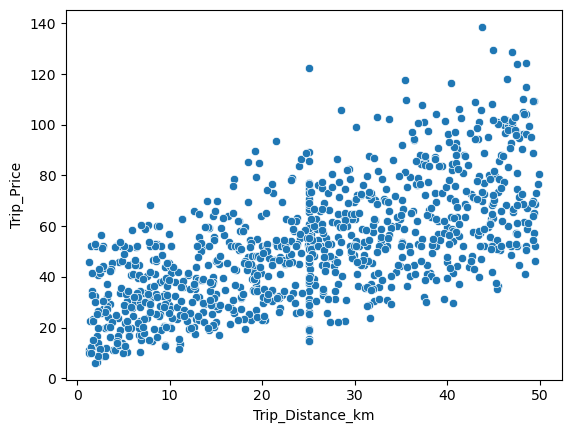

In [19]:
sns.scatterplot(x=df["Trip_Distance_km"],y=df["Trip_Price"])
plt.show()

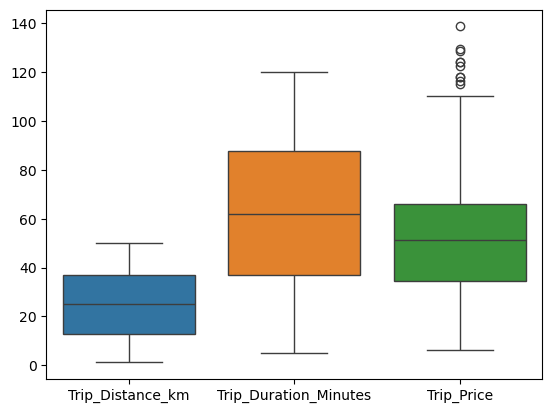

In [20]:
sns.boxplot(df[["Trip_Distance_km","Trip_Duration_Minutes","Trip_Price"]])
plt.show()

In [21]:
for col in categorical_columns:
    print(col)
    print(df[col].unique())

Time_of_Day
['Morning' 'Afternoon' 'Evening' 'Night']
Day_of_Week
['Weekday' 'Weekend']
Traffic_Conditions
['Low' 'High' 'Medium']
Weather
['Clear' 'Rain' 'Snow']


In [22]:
# independent and dependent features

X=df.drop("Trip_Price",axis=1)
y=df["Trip_Price"]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [24]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

nominal_cols = ['Time_of_Day', 'Weather', 'Day_of_Week'] 
ordinal_cols = ['Traffic_Conditions'] 
traffic_order = ['Low', 'Medium', 'High'] 

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', 
         OneHotEncoder(handle_unknown='ignore', 
                       sparse_output=False, 
                       drop='if_binary'),
         nominal_cols),
        
        ('ordinal', 
         OrdinalEncoder(categories=[traffic_order],
                        handle_unknown='use_encoded_value', 
                        unknown_value=-1), 
         ordinal_cols)
    ],
    remainder='passthrough'
)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)

In [25]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   onehot__Time_of_Day_Afternoon     735 non-null    float64
 1   onehot__Time_of_Day_Evening       735 non-null    float64
 2   onehot__Time_of_Day_Morning       735 non-null    float64
 3   onehot__Time_of_Day_Night         735 non-null    float64
 4   onehot__Weather_Clear             735 non-null    float64
 5   onehot__Weather_Rain              735 non-null    float64
 6   onehot__Weather_Snow              735 non-null    float64
 7   onehot__Day_of_Week_Weekend       735 non-null    float64
 8   ordinal__Traffic_Conditions       735 non-null    float64
 9   remainder__Trip_Distance_km       735 non-null    float64
 10  remainder__Passenger_Count        735 non-null    float64
 11  remainder__Base_Fare              735 non-null    float64
 12  remainde

In [26]:
# scaler

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_df)
X_test_scaled=scaler.transform(X_test_df)

In [28]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train_scaled,y_train)
y_pred=tree_model.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("mae:",mean_absolute_error(y_test, y_pred))
print("mse:",mean_squared_error(y_test,y_pred))
print("r2_score:",r2_score(y_test, y_pred))

mae: 10.245616920581336
mse: 186.6325541331597
r2_score: 0.6760578976977409


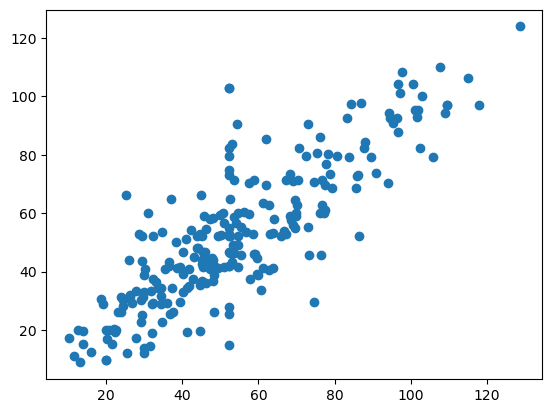

In [29]:
plt.scatter(y_test,y_pred)
plt.show();

In [30]:
# hyperparameter tuning

In [31]:
param={
    "criterion":["squared_error","absolute_error","friedman_mse","poisson"],
    "splitter":["best","random"],
    "max_depth":[1,2,3,4,5,15,None],
    "max_features":["sqrt","log2",None]
}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=param,cv=5,scoring="accuracy")
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [32]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 1,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [33]:
y_pred=tree_model.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("mae:",mean_absolute_error(y_test, y_pred))
print("mse:",mean_squared_error(y_test,y_pred))
print("r2_score:",r2_score(y_test, y_pred))

mae: 10.245616920581336
mse: 186.6325541331597
r2_score: 0.6760578976977409


In [34]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=7,algorithm="auto")
regressor.fit(X_train_scaled,y_train)
y_pred=regressor.predict(X_test_scaled)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("r2 score: ",r2_score(y_test,y_pred))
print("mae: ",mean_absolute_error(y_test,y_pred))
print("mse: ",mean_squared_error(y_test,y_pred))

r2 score:  0.5382957865248599
mae:  12.71019270040992
mse:  266.0013502490198


In [35]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred=linear.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("mae:",mae)
print("mse:",mse)
print("r2_score:",r2)

mae: 7.687423750711269
mse: 110.04625121115507
r2_score: 0.8089903761248999


In [36]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("lasso")
print("mae:",mae)
print("mse:",mse)
print("r2:",r2)

lasso
mae: 7.902215147373586
mse: 114.36472609959549
r2: 0.8014947072122686


In [37]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("ridge")
print("mae:",mae)
print("mse:",mse)
print("r2:",r2)

ridge
mae: 7.687677110313947
mse: 110.05666657106877
r2: 0.8089722979626932


In [38]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("elasticnet")
print("mae:",mae)
print("mse:",mse)
print("r2:",r2)

elasticnet
mae: 10.461802375170146
mse: 177.45942196225099
r2: 0.6919798987331042


In [39]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train_scaled,y_train)
y_pred=svr.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("mae:",mae)
print("mse:",mse)
print("r2_score:",r2)

mae: 12.44568574266685
mse: 279.87767168714726
r2_score: 0.5142103596293907


In [40]:
from sklearn.model_selection import GridSearchCV
param_grid={
    "C":[0.1,1,10,100,1000],
    "gamma":[1,0.1,0.001],
    "kernel":["rbf","linear"]
}

grid=GridSearchCV(estimator=SVR(),param_grid=param_grid,n_jobs=-1,verbose=3)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [41]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [42]:
from sklearn.svm import SVR
svr=SVR(kernel="rbf",C=1000,gamma=0.001)
svr.fit(X_train_scaled,y_train)
y_pred=svr.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("r2_score:",r2)

mae: 6.345951066859027
mse: 87.87139034952047
r2_score: 0.8474797547820272


In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2, include_bias=True)
X_train_poly=poly.fit_transform(X_train_scaled)
X_test_poly=poly.transform(X_test_scaled)
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("r2_score:",r2)

mae: 4.6805764563262455
mse: 69.73486723092996
r2_score: 0.8789597045409415
